In [3]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.stats as stat
import os
from jupyterthemes import jtplot

In [4]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["font.family"] = "serif"
mp.rcParams["text.usetex"] = True
mp.rcParams["font.size"] = 12

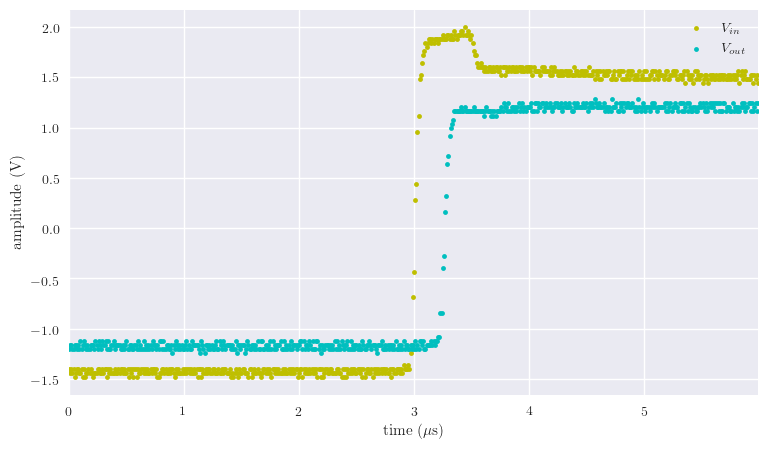

experimental c = 86725663


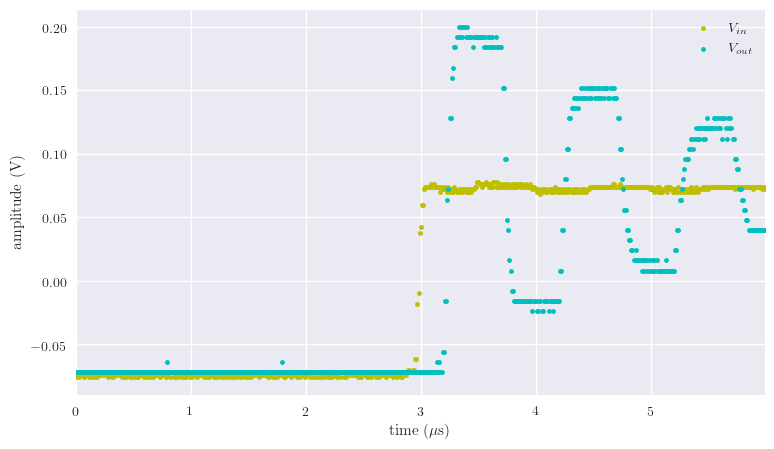

experimental c = 612500000


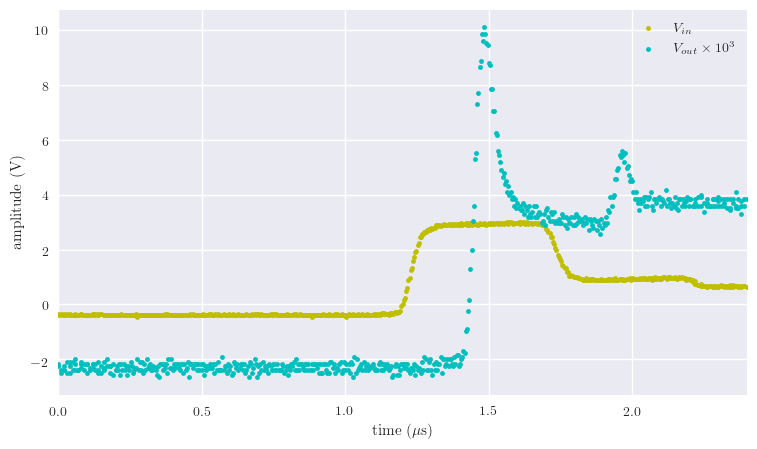

experimental c = 1224999999


In [21]:
L = 49
c = 3e8
    
for _, __, files in os.walk("."):
    for file in files:
        if file.endswith("2.csv"):
            t, Vin, Vout = np.genfromtxt(file, delimiter=",", skip_header=2, usecols=(0,1,2), unpack=True)
            t += abs(t.min())
            t *= 1e6
            if "shortend" in file:
                Vout *= 1e3
            mp.plot(t, Vin, "y.", label=r"$V_{in}$")
            if "shortend" in file:
                mp.plot(t, Vout, "c.", label=r"$V_{out} \times 10^3$")
            else:
                mp.plot(t, Vout, "c.", label=r"$V_{out}$")
            mp.legend()
            mp.grid(True)
            mp.xlabel("time ($\mu$s)")
            mp.ylabel("amplitude (V)")
            mp.xlim(t.min(), t.max())
#             mp.savefig(file[:-5] + ".png", dpi=300, bbox_inches="tight")
            mp.show()
            
            t /= 1e6
            c_expt = 2*L/abs(t[np.argmax(Vout)] - t[np.argmax(Vin)])
            print("experimental c = %i" %c_expt)